# Reviewers questions for solar WIMP analysis

## Analyzers: Jeff Lazar and Ivan Martinez-Soler
## Wroking group reviewer: Mehr Un Nisa
## [Technote](https://www.overleaf.com/read/xcndhqsgmzkz)
## [Wiki page](https://wiki.icecube.wisc.edu/index.php/IC86_Solar_WIMP_2023)

### Q0. Do you have a qualitative sense of why the b quark channel is more sensitive to the EW correction than the W? Naively, I would expect the opposite.

My understanding is that in the absence of the EW correction, the $b$ quark hadronizes, splitting its energy up among many, many hadrons that interact and lose energy before potentially decaying to neutrinos. When you introduce the EW correction, you can produce $W^{1,2,3}$ which change into $W^{\pm}$ and $Z^{0}$ below the EW scale. These decay before interacting, giving a neutrino that carries an appreciable fraction of the initial $b$ quark energy.

In the case of annigilation to a $W$, you are still able to radiate the gauge bosons, but this just gives you the same gauge bosons with a fraction of the initial energy. This is why you see the spectrum migrate from higher to lower energies in the $W$ channel.

In short, this is because the EW correction opens new neutrino production channels in the hadronic cases, but simply modifies the energy spectrum in the boson case.

### Q1. Request for a wiki page/documentation, and list of presentations given. I understand this part is ongoing, just noting here as a reminder.

I have made a [Wiki page](https://wiki.icecube.wisc.edu/index.php/IC86_Solar_WIMP_2023) and [DocuShare](https://docushare.icecube.wisc.edu/dsweb/View/Collection-16872) to document this analysis.

### Q2. Suggestion to include the neutrino-antineutrino channel. (We discussed this on slack, the final decision rests with the analyzer.) 

I agree this should be included. I am running the analysis on these cases now, and initial results look good. I think as long as no unexpected technical issues come up, we will include this channel. I will update this later with the results.

### Q3. Can you provide the live time or total duration of individual event selections used in this work? Are pre-IC 86 epochs included? 

We are only planning to use IC86 data in this analysis. Currently, it looks like only data through 2021 is available in the event selection directories, and so the nominal runtime is 11 years. As is expected, the actual livetime is not the nominal. For the improved northern tracks selection, the per-year livetime from `/data/ana/analyses/northern_tracks/version-005-p01/GRL/IC86_{YEAR}_exp.npy` is:

| Year | Livetime (days) |
| ---- | -------- |
| 2011 | 338.1    |
| 2012 | 325.4    |
| 2013 | 352.3    |
| 2014 | 360.9    |
| 2015 | 364.6    |
| 2016 | 355.8    |
| 2017 | 409.9    |
| 2018 | 368.1    |
| 2019 | 311.0    |
| 2020 | 361.2    |
| 2021 | 256.8    |

Thus, we take the total livetime to be $328673673.7984125$ seconds.

For the OscNesxt selection, we take the livetime from the good run lists for each year.

| Year | Livetime (days) |
| ---- | --------------- |
| 2011 | 341.7           |
| 2012 | 327.7           |
| 2013 | 356.7           |
| 2014 | 364.9           |
| 2015 | 365.2           |
| 2016 | 357.2           |
| 2017 | 415.1           |
| 2018 | 368.8           |
| 2019 | 313.3           |
| 2020 | 361.3           |
| 2021 | 430.7           |

Thus we take the total livetime to be $345824815.4500002$ seconds

The code to reproduce each of these livetimes can be found in the block below.

In [1]:
ps_total_livetime = 0
for yr in [11,12,13,14,15,16,17,18,19,20,21]:
    livetime = 0
    livetimes = np.load(f"/data/ana/analyses/northern_tracks/version-005-p01/GRL/IC86_20{yr}_exp.npy")["livetime"] * 3600 * 24
    print(f"The livetime for the northern tracks selection in 20{yr} was {np.sum(livetimes) / 3600 / 24} days")
    livetime += np.sum(livetimes)
    ps_total_livetime += livetime
print(f"The total livetime for the northern tracks selection is {ps_total_livetime}")

osc_total_livetime = 0
for year in [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]:
    livetime = 0
    if year < 2016:
         fnames = [f"/data/exp/IceCube/{year}/filtered/level2pass2a/IC86_{year}_GoodRunInfo.txt"]
    elif year==2017:
        fnames = [
            f"/data/exp/IceCube/{year}/filtered/level2pass2a/IC86_{year}_GoodRunInfo.txt",
            f"/data/exp/IceCube/{year}/filtered/level2/IC86_{year}_GoodRunInfo.txt"
        ]
    else:
        fnames = [f"/data/exp/IceCube/{year}/filtered/level2/IC86_{year}_GoodRunInfo.txt"]
    for fname in fnames:
        with open(fname) as f:
            idx = 0
            for line in f:
                line_split = line.split()
                # This is a line that does not contain run information
                try:
                    int(line_split[0])
                except Exception:
                    continue
                # This is a bad run
                if not(int(line_split[1])!=0 or int(line_split[2])!=0):
                    continue

                livetime += float(line_split[3])
    osc_total_livetime += livetime
    print(f"The livetime for the OscNest selection in {year} was {livetime / 3600 / 24} days")
print(f"The total livetime for the OscNext selection is {osc_total_livetime}")

The livetime for the northern tracks selection in 2011 was 338.0927142245527 days
The livetime for the northern tracks selection in 2012 was 325.42513043981484 days
The livetime for the northern tracks selection in 2013 was 352.2774247685186 days
The livetime for the northern tracks selection in 2014 was 360.8798018078903 days
The livetime for the northern tracks selection in 2015 was 364.60025709733094 days
The livetime for the northern tracks selection in 2016 was 355.78305821759255 days
The livetime for the northern tracks selection in 2017 was 409.9114822916667 days
The livetime for the northern tracks selection in 2018 was 368.09397916666666 days
The livetime for the northern tracks selection in 2019 was 311.0416275462963 days
The livetime for the northern tracks selection in 2020 was 361.21311527777783 days
The livetime for the northern tracks selection in 2021 was 256.7748559027778 days
The total livetime for the northern tracks selection is 328673673.7984125
The livetime for th

### Q4. Can you provide a plot of the expected flux vs energy from solar atmospheric neutrinos, and the expected flux from DM annihilation for some nominal cross-section and masses on the same figure? It would be good to see if the two are even comparable or if you can just ignore the SA nus. 

Below I make a plot of the flux from neutrinos from reference dark matter hypotheses compared to the solar atmospheric flux.
The cross section of dark matter hypothesis is set to the sensitivities of this analysis.
It seems that channels whose limit is driven by the DeepCore is significantly above the solar atmospheric flux, while channels whose limit is driven by the point source selection are nearing the solar atmospheric flux.
Thus, I think it is necessary to include it for certain dark matter hypothesis, and for simplicity I would like to include it in all cases.
Perhaps a good check would be to make sure the the inject-recover fits fit the solar atmospheric flux in the channels whose senstivitiy is dominiated by the posint source selection.

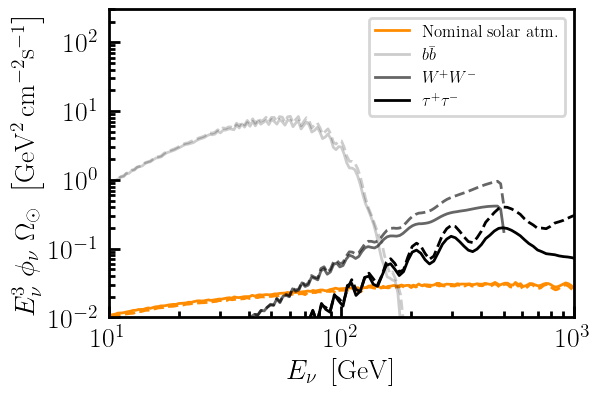

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
plt.style.use("/data/ana/BSM/IC86_all_energy_solar_WIMP/solar_WIMP_v2/paper.mplstyle")

SIGMA_REF = 1e-40 # cross section where I calculate rate

solar_atm_flux = np.genfromtxt("/data/ana/BSM/IC86_all_energy_solar_WIMP/data/tabulated_flux/SIBYLL2.3_ppMRS_CombinedGHAndHG_H4a.txt")
nominal_dm_model_0 = np.genfromtxt("/data/ana/BSM/IC86_all_energy_solar_WIMP/data/tabulated_flux/5-200.txt")
nominal_dm_model_1 = np.genfromtxt("/data/ana/BSM/IC86_all_energy_solar_WIMP/data/tabulated_flux/8-500.txt")
nominal_dm_model_2 = np.genfromtxt("/data/ana/BSM/IC86_all_energy_solar_WIMP/data/tabulated_flux/11-5000.txt")
# Limits taken from the nearest mass at https://wiki.icecube.wisc.edu/index.php/IC86:3y_solarWIMP_combined#Limits
dm_limit_0 = 9.523442833651132e-40 / SIGMA_REF
dm_limit_1 = 8.377054763487159e-42 / SIGMA_REF
dm_limit_2 = 1.026039696612497e-40 / SIGMA_REF

plt.plot(
    solar_atm_flux[:, 0],
    np.power(solar_atm_flux[:, 0], 3) * solar_atm_flux[:, 3],
    color="darkorange",
    label="Nominal solar atm."
)
plt.plot(
    solar_atm_flux[:, 0],
    np.power(solar_atm_flux[:, 0], 3) * solar_atm_flux[:, 4],
    color="darkorange",
    ls="--"
)
plt.plot(
    nominal_dm_model_0[:, 0],
    np.power(nominal_dm_model_0[:, 0], 3) * dm_limit_0 * nominal_dm_model_0[:, 3],
    color=colors.to_rgb("k") + (0.2,),
    label=r"$b\bar{b}$"
)
plt.plot(
    nominal_dm_model_0[:, 0],
    np.power(nominal_dm_model_0[:, 0], 3) * dm_limit_0 * nominal_dm_model_0[:, 4],
    color=colors.to_rgb("k") + (0.2,),
    ls="--"
)
plt.plot(
    nominal_dm_model_1[:, 0],
    np.power(nominal_dm_model_1[:, 0], 3) * dm_limit_1 * nominal_dm_model_1[:, 3],
    color=colors.to_rgb("k") + (0.6,),
    label=r"$W^{+}W^{-}$"
)
plt.plot(
    nominal_dm_model_1[:, 0],
    np.power(nominal_dm_model_1[:, 0], 3) * dm_limit_1 * nominal_dm_model_1[:, 4],
    color=colors.to_rgb("k") + (0.6,),
    ls="--"
)
plt.plot(
    nominal_dm_model_2[:, 0],
    np.power(nominal_dm_model_2[:, 0], 3) * dm_limit_2 * nominal_dm_model_2[:, 3],
    color=colors.to_rgb("k") + (1.0,),
    label=r"$\tau^{+}\tau^{-}$"
)
plt.plot(
    nominal_dm_model_2[:, 0],
    np.power(nominal_dm_model_2[:, 0], 3) * dm_limit_2 * nominal_dm_model_2[:, 4],
    color=colors.to_rgb("k") + (1.0,),
    ls="--"
)
plt.xlim(10, 1e3)
plt.ylim(1e-2, 3e2)
plt.loglog()
plt.legend(fontsize=12, loc=1)
plt.xlabel(r"$E_{\nu}~\left[\mathrm{GeV}\right]$")
plt.ylabel(r"$E_{\nu}^{3}~\phi_{\nu}~\Omega_{\odot}~\left[\mathrm{GeV}^{2}\,\mathrm{cm}^{-2}\mathrm{s}^{-1}\right]$")
plt.show()

### Q5.  The Northern tracks selection is limited to declination angles > -5˚ (or zenith > 85˚), whereas the Sun does go down to -20˚ for some part of the year. Do you have an estimate of how much signal you lose by this zenith cut on events. It will give you sense of potential improvements in future with an all-sky dataset. 

My feeling is that it should be proportional to the amount of time that the Sun spends in that portion of phase space times the effective area. I guess this first factor is around a factor of two since the time is roughly symmetric around $\theta=90^{\circ}$ and is concentrated at extremal values.

Below I compare the effective areas of the two selections in the relevant declination ranges. In the energy range relevant to this analysis—10 TeV and below—The ESTES effective area is at least a factor of 30 smaller than the northern tracks selection. Thus it should have a negligible contribution to the sensitivity. Going forward, we will not include ESTES.

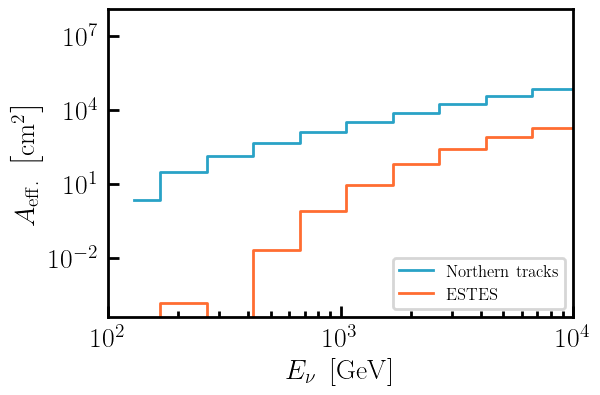

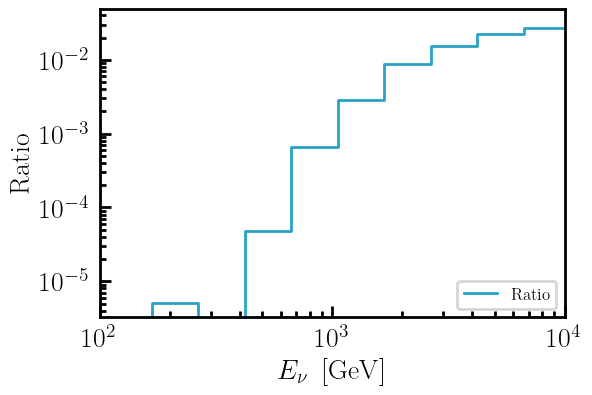

In [3]:
es = np.logspace(2, 8, 31)
widths = es[1:] - es[:-1]
cents = (es[1:] + es[:-1]) / 2

estes_mc = np.load("/data/ana/analyses/estes_ps/version-001-p03/MC_All_Combined.npy")
decmin = np.radians(-20)
decmax = np.radians(-5)
omega = 2 * np.pi * (np.sin(decmax) - np.sin(decmin))
dec_mask = np.logical_and(decmin < estes_mc["trueDec"], estes_mc["trueDec"] < decmax)
muon_mask = np.abs(estes_mc["primary_pid"])==14

h_estes, _ = np.histogram(
    estes_mc[np.logical_and(dec_mask, muon_mask)]["trueE"],
    bins=es,
    weights=estes_mc[np.logical_and(dec_mask, muon_mask)]["ow"]
)
estes_effa = h_estes / widths / omega

nt_mc = np.load("/data/ana/BSM/IC86_all_energy_solar_WIMP/data/point_source_data/IC86_pass2_MC.npy")
decmin = np.radians(-5)
decmax = np.radians(20)
omega = 2 * np.pi * (np.sin(decmax) - np.sin(decmin))
dec_mask = np.logical_and(decmin < nt_mc["trueDec"], nt_mc["trueDec"] < decmax)

h_nt, _ = np.histogram(
    nt_mc[dec_mask]["trueE"],
    bins=es,
    weights=nt_mc[dec_mask]["ow"]
)
nt_effa = h_nt / widths / omega

plt.step(cents, nt_effa, label="Northern tracks", where="mid")
plt.step(cents, estes_effa, label="ESTES", where="mid")
plt.legend(fontsize=12, loc=4)
plt.xlabel(r"$E_{\nu}~\left[\mathrm{GeV}\right]$")
plt.ylabel(r"$A_{\mathrm{eff.}}~\left[\mathrm{cm^{2}}\right]$")
plt.loglog()
plt.xlim(100, 10000)
plt.show()

plt.step(cents, estes_effa / nt_effa, label="Ratio", where="mid")
plt.legend(fontsize=12, loc=4)
plt.xlabel(r"$E_{\nu}~\left[\mathrm{GeV}\right]$")
plt.ylabel(r"Ratio")
plt.xlim(100, 10000)
plt.loglog()
plt.show()

### Q6. Do you know how many events or what percentage of events you lose in OscNext with the Muon filter and Lowup I3 cuts? 

We can get a rough idea of this by comparing the drop in the all-sky rate. I do this below. I will do more rigorous checks on this by running the analysis code through to final level.

In [4]:
from solar_common.event_reader import EventReader, Selection, DataType, event_reader_from_file

nominal_oscnext_fluxf = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/mc_fluxes/oscnext_mc_flux.h5"
nominal_oscnext_mcf = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/oscNext_data/oscNext_simulation.h5"
events = event_reader_from_file(nominal_oscnext_mcf, Selection.OSCNEXT, DataType.MC)
model = "5-100"
with h5.File(nominal_oscnext_fluxf, "r") as h5f:
#     flux = h5f[model][:]
no_muon_mask = events.passed_muon==0

rate = np.sum(flux * events.oneweight)
no_muon_rate = np.sum(flux[no_muon_mask] * events.oneweight[no_muon_mask])

print(f"We expect to retain {no_muon_rate / rate * 100}% of events.")

IndentationError: expected an indented block (<ipython-input-4-eae25002fbc9>, line 9)

### Q7. It was unclear to me if you still plan on using the Lowup I3 selection for intermediate energies or only sticking to Northern tracks and Oscnext. Can you please clarify? Also, would this be the first analysis using the Lowup I3 selection? The status of ESTES inclusion is also unclear. 

As discussed in Q5, we will not be adding ESTES to this analysis. We were hoping to include the Lowup intermediate energy selection in this analysis, but I do not think it will be ready in time for my graduation timeline. I think that we will continue to develop this selection, but that will be reserved for a separate effort. Thus this analysis will use northern tracks and OscNext with MuonFilter events removed since this will ensure statistical independence of the two selections.

### Q8. (a) As I understand you have 3D bins: angular distance, energy, and morphology. Can you comment on why the binning in morphology is useful -- especially if you're assuming an equal flavor ratio in annihilation final states? Or is that not the case? We also know that in the northern tracks there is only one morphology. (b) Can you add histograms of the signal and bkg distributions in different morphology bins?

We don't assume an equal flavor ratio, but when the fluxes reach Earth, the have typically reached an equal flavor ratio. Since our background is primarily conventional atmospheric neutrinos, it is mostly created as muon neutrinos, and does not have time to oscillate to an equal flavor ratio. Thus, we get an increased signal-to-background ratio in the cascade-like bins. We only include this additional variable for the OscNext selection, since as you rightly point out, there is only one morphology in the northern tracks selection.

See plots below !

In [ ]:
from matplotlib.gridspec import GridSpec
def plot_triptych(arr: np.ndarray, show=True, figname="", **kwargs) -> None:
    if arr.ndim != 3:
        raise ValueError("Expecting ndim=3. Got ndim={arr.ndim}")
    
    z = np.log10(arr)
    
    # Configure imshow options
    vmin = np.min(z[np.isfinite(z)])
    vmax = np.max(z)
    if "vmax" in kwargs:
        vmax = kwargs["vmax"]
    if "vmin" in kwargs:
        vmin = kwargs["vmin"]
        
    cmap = "Greys"
    if "cmap" in kwargs:
        cmap = kwargs["cmap"]
    
    figsize = (15, 5)
    if "figsize" in kwargs:
        figsize = kwargs["figsize"]
    fig = plt.figure(figsize=figsize)
    
    gs = GridSpec(1, 3, wspace=0.02)
    
    # Configure xaxis
    xmin = 0
    if "xmin" in kwargs:
        xmin = kwargs["xmin"]
    xmax = 180
    if "xmax" in kwargs:
        xmax = kwargs["xmax"]
    
    xlabel = r"$\psi~\left[^{\circ}\right]$"
    if "xlabel" in kwargs:
        xlabel = kwargs["xlabel"]
    
    # Configure the yaxis
    ymin = 0
    if "ymin" in kwargs:
        ymin = kwargs["ymin"]
    ymax = 6
    if ymax in kwargs:
        ymax = kwargs["ymax"]
    
    
    ylabel = r"$E_{\rm{reco}}~\left[{\rm{GeV}}\right]$"
    if "ylabel" in kwargs:
        ylabel = kwargs["ylabel"]
    
    yticks = np.arange(np.ceil(ymin), np.ceil(ymax))
    ytick_labels = [r"$10^{%d}$" % yt for yt in yticks]

    # Configure colorbar
    
    cbar_label = r"$\log_{10}\left(N_{\rm{evts.}}\right)$"
    if "cbar_label" in kwargs:
        cbar_label = kwargs["cbar_label"]

    for idx, spec in enumerate(gs):
        ax = fig.add_subplot(spec)
        im = ax.imshow(
            z[:,:,idx].T[::-1],
            extent=[0, 180, -3, 6],
            vmin=vmin,
            vmax=vmax,
            cmap=cmap,
            aspect="auto"
        )
        
        ax.set_ylim(ymin, ymax)
        ax.set_xlabel(xlabel)
        ax.set_xlim(xmin, xmax)
        [border.set_linewidth(2) for border in ax.spines.values()]
        
        if idx==0:
            ax.set_ylabel(ylabel)
            ax.set_yticks(yticks)
            ax.set_yticklabels(ytick_labels)
        else:
            ax.set_yticks(yticks)
            ax.set_yticklabels([])
    
        if idx==1:
            if "title" in kwargs:
                ax.set_title(kwargs["title"])
    
    fig.subplots_adjust(right=0.835)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, label=cbar_label)
    [border.set_linewidth(2) for border in cbar.ax.spines.values()]
        
    if figname:
        plt.savefig(figname)
    
    if show:
        plt.show()

In [ ]:
from solar_common.utils import (
    oscnext_yearmaker,
    ps_yearmaker,
    prepare_data_distribution,
    prepare_simulation_distribution
)
from solar_common.event_reader import Selection

LIVETIME_DICT = {
    Selection.OSCNEXT: 345824815.4500002,
    Selection.POINTSOURCE: 328673673.7984125
}

oscnext_data_file = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/analysis_distributions/oscnext_scrambled_data_no_muon.h5"
oscnext_mc_file = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/analysis_distributions/oscnext_mc_no_muon.h5"
model0 = "5-200"
model1 = "11-50"

# Load up the simualtion
with h5.File(oscnext_mc_file, "r") as h5f:
    osc_nom_sig0 = LIVETIME_DICT[Selection.OSCNEXT] * prepare_simulation_distribution(h5f, model0)
    osc_nom_sig1 = LIVETIME_DICT[Selection.OSCNEXT] * prepare_simulation_distribution(h5f, model1)
    
# Load up the scrambled data
with h5.File(oscnext_data_file, "r") as h5f:
    osc_nom_bg = prepare_data_distribution(h5f, oscnext_yearmaker)


In [ ]:
plot_triptych(osc_nom_sig0, xmax=50, title=model0)
plot_triptych(osc_nom_sig1, xmax=50, title=model1)
plot_triptych(osc_nom_bg, xmax=50, title="Background")

### Q9. You show the bkg and signal distributions in a 12-degree psi? Is that just a plotting choice or a hard cut on the analysis region? Because at low energies the angular uncertainty of events would be much higher than 12.

This is just a plotting choice ! The code below will plot for other regions of the sky.

In [ ]:
def plot_analysis_distribution(arr: np.ndarray, figname="", show=True, ax=None, **kwargs):
    
    if arr.ndim!=2:
        raise ValueError("arr ndim=={arr.ndim}!=2.")
    
    figsize = (6, 5)
    
    if ax is None:
        if "figsize" in kwargs:
            figsize = kwargs["figsize"]
        fig, ax = plt.subplots(figsize=figsize)
    
    z = np.log10(arr.T[::-1])
    
    vmin = np.min(z[np.isfinite(z)])
    if "vmin" in kwargs:
        vmin = kwargs["vmin"]
    vmax = np.max(z)
    if "vmax" in kwargs:
        vmax = kwargs["vmax"]
        
    cmap = "Greys"
    if "cmap" in kwargs:
        cmap = kwargs["cmap"]
        
    im = ax.imshow(
        z,
        extent=[0, 180, -3, 6],
        vmin=vmin,
        vmax=vmax,
        cmap=cmap,
        aspect="auto"
    )
    
    # Configure the xaxis
    xmin = 0
    if "xmin" in kwargs:
        xmin = kwargs["xmin"]
    xmax = 180
    if "xmax" in kwargs:
        xmax = kwargs["xmax"]
    ax.set_xlim(xmin, xmax)
    
    xlabel = r"$\psi~\left[^{\circ}\right]$"
    if "xlabel" in kwargs:
        xlabel = kwargs["xlabel"]
    ax.set_xlabel(xlabel)
    
    # Configure the yaxis
    ymin = 0
    if "ymin" in kwargs:
        ymin = kwargs["ymin"]
    ymax = 6
    if ymax in kwargs:
        ymax = kwargs["ymax"]
    ax.set_ylim(ymin, ymax)
    
    ylabel = r"$E_{\rm{reco}}~\left[{\rm{GeV}}\right]$"
    if "ylabel" in kwargs:
        ylabel = kwargs["ylabel"]
    ax.set_ylabel(ylabel)
    
    yticks = np.arange(np.ceil(ymin), np.ceil(ymax))
    ytick_labels = [r"$10^{%d}$" % yt for yt in yticks]
    ax.set_yticks(yticks)
    ax.set_yticklabels(ytick_labels)
    
    [border.set_linewidth(2) for border in ax.spines.values()]
    
    # Configure colorbar
    
    cbar_label = r"$\log_{10}\left(N_{\rm{evts.}}\right)$"
    if "cbar_label" in kwargs:
        cbar_label = kwargs["cbar_label"]
        
    cbar = plt.colorbar(im, label=cbar_label)
    [border.set_linewidth(2) for border in cbar.ax.spines.values()]
    
    # Set a title
    if "title" in kwargs:
        ax.set_title(kwargs["title"], fontsize=15)
        
    if "text" in kwargs:
        ax.text(0.5, 5.5, kwargs["text"])
    
    if figname:
        plt.savefig(figname)
    
    if show:
        plt.show()
        
    if "return_ax" in kwargs:
        if kwargs["return_ax"]:
            return ax
    plt.close()

In [ ]:
from solar_common.utils import (
    oscnext_yearmaker,
    ps_yearmaker,
    prepare_data_distribution,
    prepare_simulation_distribution
)
from solar_common.event_reader import Selection

LIVETIME_DICT = {
    Selection.OSCNEXT: 345824815.4500002,
    Selection.POINTSOURCE: 328673673.7984125
}

oscnext_data_file = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/analysis_distributions/oscnext_scrambled_data_no_muon.h5"
oscnext_mc_file = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/analysis_distributions/oscnext_mc_no_muon.h5"
ps_data_file = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/analysis_distributions/ps_scrambled_data.h5"
ps_mc_file = "/data/ana/BSM/IC86_all_energy_solar_WIMP/data/analysis_distributions/IC86_pass2_MC_distributions.h5"
model = "5-500"

# Load up the simualtion
with h5.File(oscnext_mc_file, "r") as h5f:
    osc_nom_sig = LIVETIME_DICT[Selection.OSCNEXT] * prepare_simulation_distribution(h5f, model)
with h5.File(ps_mc_file, "r") as h5f:
    ps_nom_sig = LIVETIME_DICT[Selection.POINTSOURCE] * prepare_simulation_distribution(h5f, model)
    
# Load up the scrambled data
with h5.File(oscnext_data_file, "r") as h5f:
    osc_nom_bg = prepare_data_distribution(h5f, oscnext_yearmaker)
with h5.File(ps_data_file, "r") as h5f:
    ps_nom_bg = prepare_data_distribution(h5f, ps_yearmaker)

In [ ]:
# Plot the background
plot_analysis_distribution(ps_nom_bg, title="All-sky ps background")
plot_analysis_distribution(ps_nom_bg, xmax=30)
plot_analysis_distribution(osc_nom_bg.sum(axis=-1), title="All-sky OscNext background")
plot_analysis_distribution(osc_nom_bg.sum(axis=-1), xmax=30)
 
# Plot the signal
plot_analysis_distribution(ps_nom_sig, title="All-sky ps signal")
plot_analysis_distribution(ps_nom_sig, xmax=30)
plot_analysis_distribution(osc_nom_sig.sum(axis=-1), title="All-sky OscNext signal")
plot_analysis_distribution(osc_nom_sig.sum(axis=-1), xmax=30)

### Q10. You show the signal/bkg distributions for both OscNext and Northern tracks separately. Are they combined at some point (how)? Or do you only use one dataset for a certain set of masses and the other for the rest? 

Since the sets are disjoint due to the filtering criterion, we have
$$
\mathcal{L}_{\mathrm{tot.}} = \prod_{\{\mathrm{sels.}\}}\mathcal{L}_{i} \rightarrow TS_{\mathrm{tot.}} = \sum_{\{\mathrm{sels.}\}} TS_{i}
$$
so we compute the test statistic for each selection and then sum the test statistics to get the total. In practice, we always consider both selections, but often it is only one that is driving the sensitivity.

### Q11. In the likelihood maximization, is the solar atmospheric background normalization fitted separately or kept fixed? 

The solar atmospheric background is fit along with the scrambled data normalization and, in the case of signal fits, the signal. We do enforce that it cannot be fit to a value greater than the 99% upper limit from the previous IceCube solar WIMP search.

### Q12. Once the sensitivity curves are finalized, can you also include lines from the most recent IC analyses and a few external experiments for comparison? 

Definitely !

## Q13. In order to ensure statistical independence from our high- and medium-energy samples, we need to impose further cuts on this nominal selection. We do this by removing all events which pass either the MuonFilter 13 or Lowup 13  filters, as these are prerequisites to entering the high- and medium-energy selections respectively." Why apply this cut rather than only removing the events which are in both sets? Why apply this cut rather than only removing the events which are in both sets?

This cut is made because otherwise there is no way to ensure statistical independence of the simulation. Obviously in the data you can pick out events one-by-one, but in the simulation there is no way ot do this. 
This could casue a situiation where you events are being double counted whne computing the expected signal event rate.
Having overlapping regions of phase space also makes weighting a bit challenging since you need to consider the joint probability of generation between two different sets.
To summarize, you need to pick a quantity that can be computed in data and MC to ensure statistical independence and event-by-event overlaps cannot work in MC.

## Q14. The tech note describes the development of a medium energy event selection. However, this does not seem to be included in the analysis presented afterwards. What is the status/plan?

This will not make it into this current analysis, but it is a medium-term goal for a follow-up analysis.
At present, our plan is to unblind the combined northern tracks and DeepCore selections and continue work on the medium-energy selection.

## Q15. Is there anything to gain or lose in sensitivity by choosing a different maximal opening angle to the sun, i.e. focusing on events that are better aligned with the direction of the sun?

We do not make any cut on the opening angle to the Sun.
The plots in the draft often end at 12$^{\circ}$ for visualization reasons, but we consider all events.
The likelihood method accounts for this and events with large opening angles do not contribute to the likelihood, *i.e.* the value of that bin in the signal and background fits will be the same and so the contribution to $\Delta \mathrm{LLH}$ wil be zero.

## Q16. When creating the signal distribution, is there a benefit of randomly sampling times over a year versus slicing a year in equal bins?

We chose this approach to computing the signal distributions for two reason.

The first reason is that the slicing approach leaves you vulnerable to picking a slice that lies in a "weird" region of phase space.
We are effectively computing time-integrated average of the signal expectation, and so we can illustrate this issue in terms of numerical approximations of an integral.
The "taking slices" approach is equivalent to the rectangular approximation of the integral.
If the center of your slice lies at a point where the second derivative is non-zero---and the position of the Sun follows a trigonometric function and thus the measure of phase space where the second derivative vannishes is zero---this results in an error on the integration.
If, on the other hand, you compute the integral via a weighted average over appropriately-sampled points, this approximation will converge to the integral value with no error.
We acknowledge that this point is very theoretical, and we do not expect the two methods to produce distinguishable results.

The second reason for this choice is more practical as it makes computing additional MC easy.
If one were to use the slicing method and realized the number of slice points was not fine enough, they would need to choose a new set of points that never overlap any previous set of points and rerun the code.
This is not impossible, but would likely require editing the source file and keep track of all previous sets of points.
In the randomly sampled case, one needs only run the same code with a different seed to the random number generation.

## Q17. Do you completely get rid of empty bins through oversampling or do you end up assigning some small value to problematic bins?

We completely remove them.
This is a conservative choice as they are consistently removed in both fits.
We plan to check that no events appear in the removed bins as a pre-unblinding check.

## Q18. The OscNext distributions are binned in energy, opening angle, and a morphology score. You only show the 2d E-psi histograms, could you also show the other projections?

We have added this.

## Q19. The 90% background TS value in Fig. 7 (5-200) does not match the one in Fig. 6. Outdated plots or am I missing something?

Sorry, this is a plotting artifact.
In Fig. 6, we only fill bins that are spanned by the 90% quantile of the background TS distribution.
This leads to the filled region in Fig. 6 systematically undershotting the value plotted in Fig. 7.
I am thinking about how to better represent this in the plots, but if you have any thoughts, please let me know.
I think I know an approach but it will take a little work to implement.

## Q20. Do you expect any effect on the analysis from the time-dependent sun shadow, e.g. in the terrestrial atmospheric neutrino background in the direction of the sun?

We do not currently understand how the Sun shadow affects our sensitivity.
Based on conversations we had at ICRC about HAWC recent detection of solar atmospheric gamma rays, it seems that this should play an important role.
The scale of this effect is not understood currently since the impact on sensitivity is a function of angular resolution and HAWC's and IceCube's angular resolution are very different.

The current analysis is conservative as including this effect will only decrease the background, thus improving the sensitivity.
We do not plan to include this effect in the current analysis.
We plan instead to include this in a near-future analysis that uses the medium-energy selectin and an updated calculation of the solar CR shadow. 